In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e9/sample_submission.csv
/kaggle/input/playground-series-s3e9/train.csv
/kaggle/input/playground-series-s3e9/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s3e9/train.csv')
test =pd.read_csv('/kaggle/input/playground-series-s3e9/test.csv')
train

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19
...,...,...,...,...,...,...,...,...,...,...
5402,5402,446.0,24.0,79.0,162.0,11.6,967.0,712.0,3,15.42
5403,5403,350.0,0.0,0.0,203.0,0.0,974.0,775.0,180,49.20
5404,5404,295.8,0.0,0.0,185.7,0.0,1076.2,759.3,28,39.30
5405,5405,376.0,93.4,0.0,162.6,11.5,955.8,662.9,28,39.61


In [3]:
train.isnull().any()

id                           False
CementComponent              False
BlastFurnaceSlag             False
FlyAshComponent              False
WaterComponent               False
SuperplasticizerComponent    False
CoarseAggregateComponent     False
FineAggregateComponent       False
AgeInDays                    False
Strength                     False
dtype: bool

<AxesSubplot:>

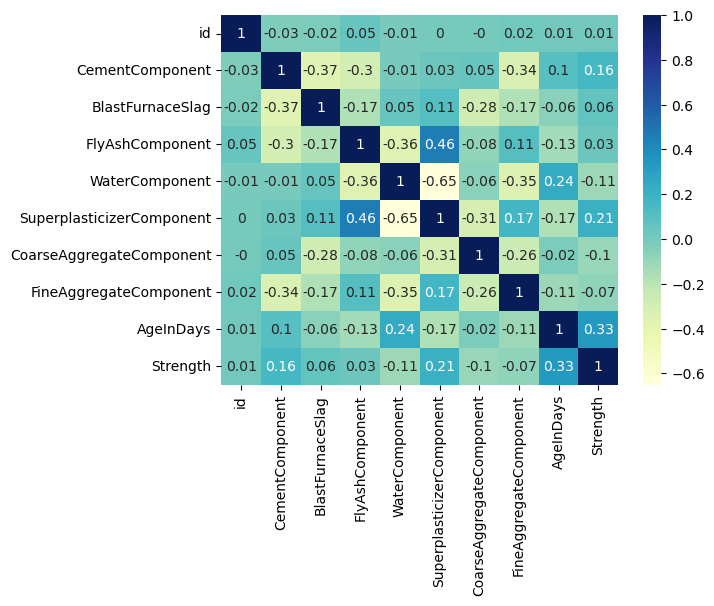

In [4]:
import seaborn as sns
sns.heatmap(data=train.corr().round(2),cmap="YlGnBu",annot=True)

In [5]:
def clean(data):
    data=data.drop(['id','FlyAshComponent'],axis=1)
    return data

train_pre=clean(train)
test_pre=clean(test)

In [6]:
from sklearn.model_selection import train_test_split

y=train_pre['Strength']
X=train_pre.drop('Strength',axis=1)

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,CementComponent,BlastFurnaceSlag,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
5173,277.1,0.0,160.6,11.8,973.9,875.6,28
3288,425.0,106.3,151.4,18.6,936.0,803.7,7
1010,362.6,189.0,164.9,11.6,944.7,755.8,91
1029,349.0,0.0,192.0,0.0,1047.0,806.0,7
4665,339.0,0.0,197.0,0.0,968.0,781.0,28
...,...,...,...,...,...,...,...
3772,350.0,0.0,186.0,0.0,974.0,775.0,56
5191,250.2,166.8,185.7,0.0,1111.6,784.3,28
5226,540.0,0.0,173.2,0.0,1125.0,613.2,7
5390,500.0,153.0,200.0,0.0,1125.0,613.0,180


In [7]:
from sklearn.preprocessing import StandardScaler

num_features=[x for x in train_pre.columns.to_list() if x != 'Strength']
scaler = StandardScaler()

X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_val[num_features] = scaler.transform(X_val[num_features])
X_train

,CementComponent,BlastFurnaceSlag,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
5173,-0.209582,-0.702545,-1.328663,1.353045,-0.236797,1.329784,-0.340026
3288,1.189690,0.573423,-1.827492,2.550862,-0.726796,0.415288,-0.637982
1010,0.599328,1.566109,-1.095514,1.317815,-0.614316,-0.193952,0.553843
1029,0.470659,-0.702545,0.373864,-0.725520,0.708292,0.444542,-0.637982
4665,0.376050,-0.702545,0.644967,-0.725520,-0.313077,0.126567,-0.340026
...,...,...,...,...,...,...,...
3772,0.480120,-0.702545,0.048540,-0.725520,-0.235504,0.050253,0.057249
5191,-0.464081,1.299632,0.032274,-0.725520,1.543488,0.168540,-0.340026
5226,2.277698,-0.702545,-0.645483,-0.725520,1.716733,-2.007680,-0.637982
5390,1.899260,1.133984,0.807628,-0.725520,1.716733,-2.010224,1.816610


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [9]:
from sklearn.metrics import mean_squared_error
def root_mean_squared_error(y_true, y_pred):
        return np.sqrt(mean_squared_error(y_pred , y_true))

In [10]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)
score = cross_val_score(lr, X_train, y_train, scoring="neg_root_mean_squared_error")

print(f'RMSE score train : {-1 * np.mean(score)}')
print(f'RMSE score test : {root_mean_squared_error(y_val, lr.predict(X_val))}')

RMSE score train : 14.63830186745902
RMSE score test : 14.414205513407389


In [11]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators= 200, max_depth= 6,random_state=42,n_jobs=-1)
rfr.fit(X_train,y_train)
score = cross_val_score(rfr, X_train, y_train, scoring="neg_root_mean_squared_error")

print(f'RMSE score train : {-1 * np.mean(score)}')
print(f'RMSE score test : {root_mean_squared_error(y_val, rfr.predict(X_val))}')

RMSE score train : 12.27752047273192
RMSE score test : 11.792757894509554


In [25]:
%%time
import optuna
def objective_rfr(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 350),
        'max_depth': trial.suggest_int('max_depth', 3,8),
        
    }
    rfr=RandomForestRegressor(**params)
    # 使用訓練資料訓練模型
    rfr.fit(X_train,y_train)
    rmse=mean_squared_error(y_val, rfr.predict(X_val),squared = False)

    return rmse

study_rfr = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_rfr.optimize(objective_rfr, n_trials=100)

CPU times: user 2min 39s, sys: 613 ms, total: 2min 39s
Wall time: 2min 40s


In [26]:
optuna.visualization.plot_slice(study_rfr)

In [27]:
optuna.visualization.plot_parallel_coordinate(study_rfr)

In [28]:
optuna.visualization.plot_optimization_history(study_rfr)

In [29]:
rfr=RandomForestRegressor(**study_rfr.best_params)
rfr.fit(X_train,y_train)
print(f'RMSE score test : {root_mean_squared_error(y_val, rfr.predict(X_val))}')

RMSE score test : 11.781678647189064


In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators= 500, max_depth= 6,random_state=42,learning_rate=0.01,min_samples_split=3)
gbr.fit(X_train,y_train)
score = cross_val_score(gbr, X_train, y_train, scoring="neg_root_mean_squared_error")

print(f'RMSE score train : {-1 * np.mean(score)}')
print(f'RMSE score test : {root_mean_squared_error(y_val, gbr.predict(X_val))}')

RMSE score train : 12.485406721859757
RMSE score test : 11.947157103854575


In [31]:
prediction=(rfr.predict(X_val)+gbr.predict(X_val))/2

print(f'RMSE score train : {-1 * np.mean(score)}')
print(f'RMSE score test : {root_mean_squared_error(y_val,prediction )}')

RMSE score train : 12.485406721859757
RMSE score test : 11.822747114342354


In [32]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor()
sgdr.fit(X_train,y_train)
score = cross_val_score(sgdr, X_train, y_train, scoring="neg_root_mean_squared_error")

print(f'RMSE score train : {-1 * np.mean(score)}')
print(f'RMSE score test : {root_mean_squared_error(y_val, sgdr.predict(X_val))}')

RMSE score train : 14.636280837702817
RMSE score test : 14.438159785386256


In [33]:
from sklearn.metrics import mean_squared_error
def root_mean_squared_error(y_true, y_pred):
        return np.sqrt(mean_squared_error(y_pred,y_true))

In [10]:
%%time
import optuna
import xgboost as xgb
def objective_xgb(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 2, 5),
        'learning_rate': trial.suggest_float('learning_rate', 0.01,1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 1e-3, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 1.0),
        "tree_method":'gpu_hist'
    }
    # 建立 XGBRegressor 模型
    xgbr=xgb.XGBRegressor(**params)
    # 使用訓練資料訓練模型
    xgbr.fit(X_train,y_train)
    rmse=mean_squared_error(y_val, xgbr.predict(X_val),squared = False)

    return rmse

study_xgbr = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_xgbr.optimize(objective_xgb, n_trials=100)

[I 2023-03-22 06:07:43,475] A new study created in memory with name: no-name-86c6bee6-6dd1-4c60-9733-2398152fd72b


CPU times: user 32.9 s, sys: 1.09 s, total: 34 s
Wall time: 32.7 s


In [11]:
optuna.visualization.plot_param_importances(study_xgbr)

In [12]:
optuna.visualization.plot_optimization_history(study_xgbr)

In [13]:
study_xgbr.best_params

{'max_depth': 4,
 'learning_rate': 0.034918400613782596,
 'n_estimators': 253,
 'min_child_weight': 7,
 'gamma': 0.11407873047630537,
 'subsample': 0.8494945652394829,
 'colsample_bytree': 0.5573799879095913,
 'reg_alpha': 0.7014851609624577,
 'reg_lambda': 0.76243987483242}

In [14]:
xgbr=xgb.XGBRegressor()
# 使用訓練資料訓練模型
xgbr.fit(X_train,y_train)
print(f'RMSE score test : {root_mean_squared_error(y_val, xgbr.predict(X_val))}')

RMSE score test : 12.624826003194956


In [15]:
xgbr=xgb.XGBRegressor(**study_xgbr.best_params,tree_method='gpu_hist')
xgbr.fit(X_train,y_train)
print(f'RMSE score test : {root_mean_squared_error(y_val, xgbr.predict(X_val))}')

RMSE score test : 11.772681035091075


In [16]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [17]:
model = Sequential([
    Dense(25, input_dim=len(num_features), activation='relu'),
    Dense(89, activation='relu'),
    Dense(100,activation='relu'),
    Dense(50,activation='relu'),
    Dense(139,activation='relu'),
    Dense(1, activation='linear')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                200       
                                                                 
 dense_1 (Dense)             (None, 89)                2314      
                                                                 
 dense_2 (Dense)             (None, 100)               9000      
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 139)               7089      
                                                                 
 dense_5 (Dense)             (None, 1)                 140       
                                                                 
Total params: 23,793
Trainable params: 23,793
Non-traina

In [18]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae','accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=20)

Epoch 1/20
433/433 [==============================] - 8s 4ms/step - loss: 346.0235 - mse: 346.0235 - mae: 14.3090 - accuracy: 0.0000e+00
Epoch 2/20
433/433 [==============================] - 2s 5ms/step - loss: 209.2211 - mse: 209.2211 - mae: 11.2914 - accuracy: 0.0000e+00
Epoch 3/20
433/433 [==============================] - 2s 4ms/step - loss: 174.2086 - mse: 174.2086 - mae: 10.1936 - accuracy: 0.0000e+00
Epoch 4/20
433/433 [==============================] - 2s 4ms/step - loss: 163.0432 - mse: 163.0432 - mae: 9.8425 - accuracy: 0.0000e+00
Epoch 5/20
433/433 [==============================] - 2s 4ms/step - loss: 160.3697 - mse: 160.3697 - mae: 9.7369 - accuracy: 0.0000e+00
Epoch 6/20
433/433 [==============================] - 2s 4ms/step - loss: 155.5558 - mse: 155.5558 - mae: 9.6044 - accuracy: 0.0000e+00
Epoch 7/20
433/433 [==============================] - 2s 4ms/step - loss: 155.0190 - mse: 155.0190 - mae: 9.5816 - accuracy: 0.0000e+00
Epoch 8/20
433/433 [=========================

In [19]:
print(f'RMSE score test : {root_mean_squared_error(y_val,model.predict(X_val).reshape(-1) )}')

34/34 [==============================] - 0s 2ms/step
RMSE score test : 12.392250392502136


In [20]:
test_pre[num_features] = scaler.transform(test_pre[num_features]) 

In [21]:
submission_preds=xgbr.predict(test_pre).reshape(-1)
submission_preds

array([48.710644, 19.705141, 35.612034, ..., 39.64532 , 37.43216 ,
       19.49475 ], dtype=float32)

In [22]:
df=pd.DataFrame({"id":test['id'].values,"Strength":submission_preds})
df.to_csv("submission_S3E9.csv",index=False)